In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
%matplotlib inline

In [483]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [484]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)


In [485]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [486]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [487]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [488]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [489]:
train.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

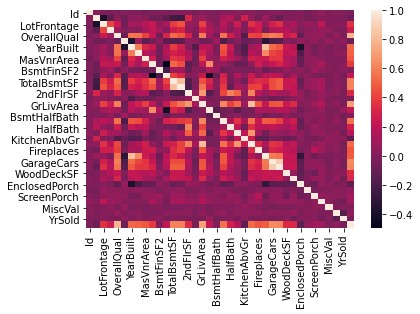

In [490]:
sns.heatmap(train.corr())

In [491]:
correlations = train.corr()['SalePrice'].sort_values(ascending=False)
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [492]:
features = correlations.iloc[1:6].index
features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [493]:
train_nulls = pd.isnull(train).sum()
test_nulls = pd.isnull(test).sum()

nulls = pd.concat([train_nulls, test_nulls], axis=1, keys=['Train', 'Test'])

In [494]:
nulls_many = nulls[nulls.sum(axis=1) > 200]
nulls_few = nulls[(nulls.sum(axis=1) < 200) & (nulls.sum(axis=1) > 0)]

nulls_many

,Train,Test
LotFrontage,259,227.0
Alley,1369,1352.0
FireplaceQu,690,730.0
PoolQC,1453,1456.0
Fence,1179,1169.0
MiscFeature,1406,1408.0


In [495]:
nulls_actual_feat = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
                     "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in nulls_actual_feat:
    train[i].fillna('No', inplace=True)
    test[i].fillna('No', inplace=True)

In [496]:
train_nulls = pd.isnull(train).sum()
test_nulls = pd.isnull(test).sum()

nulls = pd.concat([train_nulls, test_nulls], axis=1, keys=['Train', 'Test'])

nulls_many = nulls[nulls.sum(axis=1) > 200]
nulls_few = nulls[(nulls.sum(axis=1) < 200) & (nulls.sum(axis=1) > 0)]
nulls_many

,Train,Test
LotFrontage,259,227.0


In [497]:
train.drop(columns=["LotFrontage"], axis=1, inplace=True)
test.drop(columns=["LotFrontage"], axis=1, inplace=True)

In [498]:
nulls_few

,Train,Test
MSZoning,0,4.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtUnfSF,0,1.0
TotalBsmtSF,0,1.0


In [499]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
train['MasVnrType'].fillna('No', inplace=True)
test['MasVnrType'].fillna('No', inplace=True)

In [500]:
train_types = train.dtypes
train_num = train_types[(train_types == 'int64') | (train_types == 'float')]
train_cat = train_types[train_types == 'object']

test_types = test.dtypes
test_num = test_types[(test_types == 'int') | (test_types == 'float')]
test_cat = test_types[test_types == 'object']

In [501]:
numerical_train = train_num.index.to_list()
numerical_test = test_num.index.to_list()
print(numerical_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [502]:
to_fill_num = []
for i in numerical_train:
    if i in list(nulls_few.index):
        to_fill_num.append(i)
print(to_fill_num)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [503]:
for i in to_fill_num:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(test[i].median(), inplace=True)

In [504]:
categorical_train = train_cat.index.to_list()
categorical_test = test_cat.index.to_list()
print(categorical_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [505]:
to_fill_cat = []
for i in categorical_train:
    if i in list(nulls_few.index):
        to_fill_cat.append(i)
print(to_fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']


In [506]:
for i in to_fill_cat:
    train[i].fillna(train[i].mode()[0], inplace=True)
    test[i].fillna(test[i].mode()[0], inplace=True)

In [507]:
train_nulls = pd.isnull(train).sum()
test_nulls = pd.isnull(test).sum()

nulls = pd.concat([train_nulls, test_nulls], axis=1, keys=['Train', 'Test'])
nulls[nulls.sum(axis=1) > 0]

,Train,Test


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

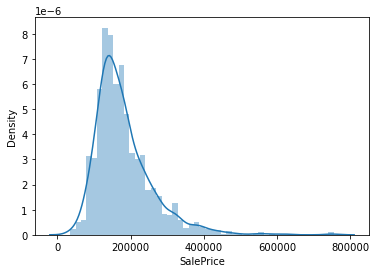

In [508]:
sns.distplot(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

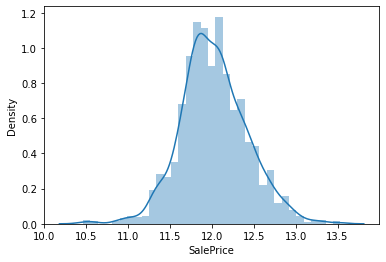

In [509]:
sns.distplot(np.log(train['SalePrice']))

In [510]:
train['train_test'] = 1
test['train_test'] = 0
test[['SalePrice', 'Transformed_Price']] = np.NaN
train['Transformed_Price'] = np.log(train['SalePrice'])
data = pd.concat([train, test])

In [511]:
dummies = pd.get_dummies(data)

In [512]:
X_train = dummies[dummies['train_test'] == 1].drop(['Id', 'SalePrice', 'Transformed_Price', 'train_test'], axis=1)
X_test = dummies[dummies['train_test'] == 0].drop(['Id', 'SalePrice', 'Transformed_Price', 'train_test'], axis=1)

y_train = dummies[dummies['train_test'] == 1].Transformed_Price

In [513]:
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.87419411 0.84828724 0.8311619  0.91413797 0.75000699]
Mean: 0.8435576423259409


In [514]:
lasso = Lasso()
cv = cross_val_score(lasso, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.82697925 0.76906631 0.81375681 0.77288069 0.54042475]
Mean: 0.7446215613443083


In [515]:
ridge = Ridge()
cv = cross_val_score(ridge, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.90319386 0.86880094 0.87909575 0.90656285 0.77626751]
Mean: 0.8667841814315557


In [516]:
dt = DecisionTreeRegressor()
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.69455719 0.73863561 0.80398314 0.68964948 0.74713465]
Mean: 0.7347920126397599


In [517]:
knn = KNeighborsRegressor()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.69616998 0.68766007 0.68525601 0.68990914 0.64917709]
Mean: 0.6816344604661602


In [518]:
rf = RandomForestRegressor(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.87390992 0.8639344  0.87060688 0.88233795 0.85377209]
Mean: 0.8689122480004976


In [536]:
voting_regr = VotingRegressor(estimators=[('lr', lr), ('lasso', lasso), ('ridge', ridge), ('knn', knn), ('rf', rf)])
cv = cross_val_score(voting_regr, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

voting_regr.fit(X_train, y_train)
y_pred_base = voting_regr.predict(X_test)
result_base = {"Id": test.Id, "SalePrice": np.exp(y_pred_base)}
submission_base = pd.DataFrame(data=result_base)
submission_base.to_csv('submission_base.csv', index=False)

[0.90194147 0.86954144 0.88386041 0.891653   0.80345442]
Mean: 0.8700901461133066


In [523]:
def performance(regressor, model_name):
    print(model_name)
    print(f"Best score: {regressor.best_score_}")
    print(f"Best parameters: {regressor.best_params_}")

In [528]:
lr = LinearRegression()
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]   
}
lr_ = GridSearchCV(lr, param_grid=parameters, cv=5, n_jobs=-1, verbose=True)
lin_reg = lr_.fit(X_train, y_train)
performance(lin_reg, 'Linear Regression')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Linear Regression
Best score: 0.8435576423259569
Best parameters: {'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


In [530]:
lasso = Lasso()
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'alpha': [0.5, 1],
    'precompute': [True, False],
    'max_iter': [1000],
    'warm_start': [True, False],
    'selection': ['cyclic', 'random']
}
lasso_ = GridSearchCV(lasso, param_grid=parameters, cv=5, n_jobs=-1, verbose=True)
lasso_reg = lasso_.fit(X_train, y_train)
performance(lasso_reg, 'Lasso Regression')

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s


Lasso Regression
Best score: 0.7645427524232706
Best parameters: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'precompute': False, 'selection': 'random', 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   10.8s finished


In [533]:
ridge = Ridge()
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'alpha': [0.5, 1],
    'max_iter': [1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}
ridge_ = GridSearchCV(ridge, param_grid=parameters, cv=5, n_jobs=-1, verbose=True)
ridge_reg = ridge_.fit(X_train, y_train)
performance(ridge_reg, 'Ridge Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    6.3s remaining:    0.4s


Ridge Regression
Best score: 0.8765000004370332
Best parameters: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 1000, 'normalize': True, 'solver': 'lsqr'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.0s finished


In [534]:
knn = KNeighborsRegressor()
parameters = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}
knn_ = GridSearchCV(knn, param_grid=parameters, cv=5, n_jobs=-1, verbose=True)
knn_reg = knn_.fit(X_train, y_train)
performance(knn_reg, 'KNN')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s


KNN
Best score: 0.7421387387327056
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.1s finished


In [535]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [100, 250, 500],
    'bootstrap': [True, False],
    'max_depth': [None, 3, 5, 10, 20, 50, 75, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}
rf_ = GridSearchCV(rf, param_grid=parameters, cv=5, n_jobs=-1, verbose=True)
rf_reg = rf_.fit(X_train, y_train)
performance(rf_reg, 'Random Forest')

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 92.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 114.0min finished


Random Forest
Best score: 0.8764872545594857
Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [539]:
best_lr = lin_reg.best_estimator_
best_lasso = lasso_reg.best_estimator_
best_ridge = ridge_reg.best_estimator_
best_knn = knn_reg.best_estimator_
best_rf = rf_reg.best_estimator_

y_pred_rf = best_rf.predict(X_test)
result_rf = {"Id": test.Id, "SalePrice": np.exp(y_pred_rf)}
submission_rf = pd.DataFrame(data=result_base)
submission_rf.to_csv('submission_rf.csv', index=False)

In [542]:
voting_regr1 = VotingRegressor(estimators=[('lr', best_lr), ('knn', best_knn), ('rf', best_rf)])
print(cross_val_score(voting_regr1, X_train, y_train, cv=5).mean())

voting_regr2 = VotingRegressor(estimators=[('lasso', best_lasso), ('knn', best_knn), ('rf', best_rf)])
print(cross_val_score(voting_regr2, X_train, y_train, cv=5).mean())

voting_regr3 = VotingRegressor(estimators=[('ridge', best_ridge), ('knn', best_knn), ('rf', best_rf)])
print(cross_val_score(voting_regr3, X_train, y_train, cv=5).mean())

voting_regr_all = VotingRegressor(estimators=[('lr', best_lr), ('lasso', best_lasso), ('ridge', best_ridge), 
                                              ('knn', best_knn), ('rf', best_rf)])
print(cross_val_score(voting_regr_all, X_train, y_train, cv=5).mean())

0.8778836724119067
0.8389570232572557
0.8736490542313435
0.873677788425917


In [543]:
y_pred_v1 = voting_regr1.fit(X_train, y_train).predict(X_test)
y_pred_v2 = voting_regr2.fit(X_train, y_train).predict(X_test)
y_pred_v3 = voting_regr3.fit(X_train, y_train).predict(X_test)
y_pred_all = voting_regr_all.fit(X_train, y_train).predict(X_test)

result_v1 = {"Id": test.Id, "SalePrice": np.exp(y_pred_v1)}
submission_v1 = pd.DataFrame(data=result_v1)
result_v2 = {"Id": test.Id, "SalePrice": np.exp(y_pred_v2)}
submission_v2 = pd.DataFrame(data=result_v2)
result_v3 = {"Id": test.Id, "SalePrice": np.exp(y_pred_v3)}
submission_v3 = pd.DataFrame(data=result_v3)
result_v_all = {"Id": test.Id, "SalePrice": np.exp(y_pred_all)}
submission_v_all = pd.DataFrame(data=result_v_all)

In [544]:
submission_v1.to_csv('submission_v1.csv', index=False)
submission_v2.to_csv('submission_v2.csv', index=False)
submission_v3.to_csv('submission_v3.csv', index=False)
submission_v_all.to_csv('submission_v_all.csv', index=False)